# Supervised Learning Walkthrough

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [9]:
df_donor_comp = pd.read_csv('data/Donors_Comp.csv', index_col = 0, header = 0)

In [10]:
df_donor_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13531 entries, 0 to 15388
Data columns (total 70 columns):
DonorID              13531 non-null int64
Donation Amount_s    13531 non-null float64
Donation Amount_c    13531 non-null float64
female               13531 non-null int64
male                 13531 non-null int64
unknown              13531 non-null int64
2009_Other           13531 non-null float64
2010_Other           13531 non-null float64
2011_Other           13531 non-null float64
2012_Other           13531 non-null float64
2012_SKRace          13531 non-null float64
2013_Other           13531 non-null float64
2013_SKRace          13531 non-null float64
2014_Other           13531 non-null float64
2014_SKRace          13531 non-null float64
2015_Other           13531 non-null float64
2015_SKRace          13531 non-null float64
2016_Concert         13531 non-null float64
2016_Other           13531 non-null float64
2016_Request         13531 non-null float64
2016_SKRace        

In [11]:
donate_1_4 = df_donor_comp['donate_1_4']
donate_2_4 = df_donor_comp['donate_2_4']

## Datasets for Regression and Classification
- The Regression DataFrame (**loan_reg**) will consist of all columns rows for which loan_is_bad is 0 (i.e loans that didn't default) with **loan_amnt** being the target. 
- The Classification DataFrame (**loan_class**) will consist of all columns with loan_is_bad being the target

In [12]:
donor_amount_sum = df_donor_comp['Donation Amount_s']
donor_amount_count = df_donor_comp['Donation Amount_c']

### Regression Analysis

### Scikit Simple Regression
using annual_inc as predictor

In [13]:
y = donor_amount_sum

In [64]:
X = df_donor_comp.iloc[:,3:46]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13531 entries, 0 to 15388
Data columns (total 43 columns):
female             13531 non-null int64
male               13531 non-null int64
unknown            13531 non-null int64
2009_Other         13531 non-null float64
2010_Other         13531 non-null float64
2011_Other         13531 non-null float64
2012_Other         13531 non-null float64
2012_SKRace        13531 non-null float64
2013_Other         13531 non-null float64
2013_SKRace        13531 non-null float64
2014_Other         13531 non-null float64
2014_SKRace        13531 non-null float64
2015_Other         13531 non-null float64
2015_SKRace        13531 non-null float64
2016_Concert       13531 non-null float64
2016_Other         13531 non-null float64
2016_Request       13531 non-null float64
2016_SKRace        13531 non-null float64
2016_ThankYou      13531 non-null float64
2016_Tour          13531 non-null float64
2017_Banquet       13531 non-null float64
2017_GolfOuting

In [65]:
#pandas_profiling.ProfileReport(X)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [67]:
y.values.reshape(-1,1)

array([[44517.52],
       [ 1360.  ],
       [   50.  ],
       ...,
       [    0.  ],
       [   50.  ],
       [  133.21]])

In [68]:
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X)
X_reg_scaled

array([[-1.03789128,  1.28635098, -0.34201184, ...,  4.79709566,
         4.37739909,  4.78496949],
       [-1.03789128, -0.77739281,  2.92387539, ..., -0.33544267,
        -0.20178389, -0.21139754],
       [ 0.96349206, -0.77739281, -0.34201184, ..., -0.33544267,
        -0.20178389, -0.21139754],
       ...,
       [ 0.96349206, -0.77739281, -0.34201184, ..., -0.33544267,
        -0.20178389, -0.21139754],
       [-1.03789128,  1.28635098, -0.34201184, ..., -0.33544267,
        -0.20178389, -0.21139754],
       [ 0.96349206, -0.77739281, -0.34201184, ..., -0.33544267,
        -0.20178389, -0.21139754]])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

iteration 0.01 done
iteration 0.025 done
iteration 0.1 done
iteration 1 done
iteration 5 done
iteration 10 done
iteration 25 done
iteration 50 done
iteration 100 done
iteration 125 done
iteration 150 done
iteration 200 done


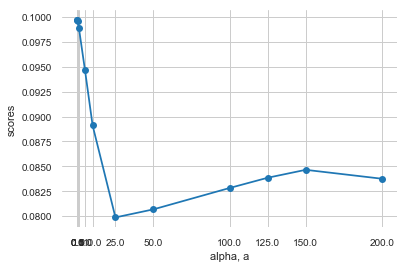

In [99]:
alphas = [0.01, 0.025, 0.1, 1, 5, 10, 25, 50, 100, 125, 150, 200]
scores = []

for a in alphas:
    lasso = Lasso(alpha = a)
    lasso.fit(X_train, y_train)
    scores.append(lasso.score(X_test, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

Alpha = 10 provides the best score (somewhat minimally)

In [113]:
lasso = Lasso(alpha=150)

In [114]:
lasso.fit(X_train, y_train)

Lasso(alpha=150, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [115]:
lasso_pred = lasso.predict(X_train)

In [116]:
lasso.score(X_test, y_test)

0.0846539084639869

In [117]:
lasso.coef_

array([  -0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,   99.69144379,   -0.        ,
        749.44076063,   -0.        , 1123.54222412,   -0.        ,
        275.2251126 ,   -0.        ,    0.        ,    0.        ,
          0.        ,   -0.        ,    0.        ,   -0.        ,
         -0.        ,   -0.        ,    0.        ,    0.        ,
         -0.        ,    0.        ,    0.        ,   -0.        ,
          0.        ,   -0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
        155.90363211,  650.25461101, 1191.43032251])

In [118]:
df_lasso = pd.DataFrame(lasso.coef_)

In [119]:
names = pd.DataFrame(list(X.columns))

In [120]:
df_lasso = pd.concat([df_lasso, names], axis = 1)

In [121]:
df_lasso.columns = ['Coefficient', 'Feature']
df_lasso

,Coefficient,Feature
0,-0.000000,female
1,0.000000,male
2,0.000000,unknown
3,0.000000,2009_Other
4,0.000000,2010_Other
5,0.000000,2011_Other
6,99.691444,2012_Other
7,-0.000000,2012_SKRace
8,749.440761,2013_Other
9,-0.000000,2013_SKRace


### Ridge

In [122]:
from sklearn.linear_model import Ridge

iteration 1 done
iteration 5 done
iteration 10 done
iteration 25 done
iteration 50 done
iteration 100 done
iteration 150 done
iteration 200 done
iteration 300 done
iteration 400 done
iteration 500 done


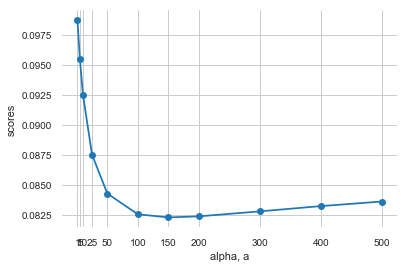

In [123]:
alphas = [1, 5, 10, 25, 50, 100, 150, 200, 300, 400, 500]
scores = []

for a in alphas:
    ridge = Ridge(alpha = a)
    ridge.fit(X_train, y_train)
    scores.append(ridge.score(X_test, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

In [144]:
ridge = Ridge(alpha=0.1)

In [145]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [146]:
ridge_preds = ridge.predict(X_test)

In [147]:
ridge.score(X_test, y_test)

0.09960375464842487

In [148]:
df_ridge = pd.DataFrame(ridge.coef_)

names = pd.DataFrame(list(X.columns))

df_ridge = pd.concat([df_ridge, names], axis = 1)

df_ridge.columns = ['Coefficient', 'Feature']
df_ridge.head()

,Coefficient,Feature
0,-98.371206,female
1,-96.147681,male
2,194.518887,unknown
3,729.142991,2009_Other
4,492.443540,2010_Other


In [149]:
lasso_pred = pd.DataFrame(lasso_pred)
ridge_pred = pd.DataFrame(ridge_preds)
preds = pd.concat([lasso_pred, ridge_pred], axis = 1)

In [150]:
preds.columns = ['Lasso', 'Ridge']

(0, 40000)

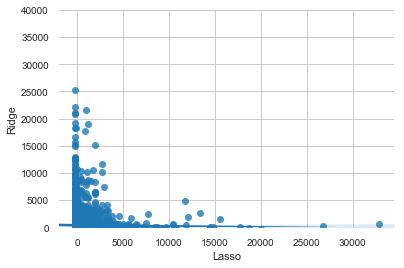

In [151]:
sns.regplot(x = 'Lasso', y = 'Ridge', data = preds)
plt.ylim(0,40000)

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
### Classification

In [152]:
y = df_donor_comp['donate_1_4']

In [153]:
y.values.reshape(-1,1)

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

### Logistic Regression
using non-scaled data

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [156]:
#without weights
logr = LogisticRegression()
logr.fit(X_train, y_train)
score = logr.score(X_test, y_test)
print(score)
print("")
log_pred = logr.predict(X_test)
print(confusion_matrix(y_test, log_pred))
print("")
print(classification_report(y_test, log_pred))

0.9842364532019704

[[3967   14]
 [  50   29]]

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3981
         1.0       0.67      0.37      0.48        79

   micro avg       0.98      0.98      0.98      4060
   macro avg       0.83      0.68      0.73      4060
weighted avg       0.98      0.98      0.98      4060



### Logistic Regression w/ Scaler

In [157]:
X_scaled = scaler.fit_transform(X)

In [158]:
X_trainSC, X_testSC, y_trainSC, y_testSC = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [159]:
logrsc = LogisticRegression(class_weight = {0:1, 1:3})
logrsc.fit(X_trainSC, y_train)
score = logrsc.score(X_testSC, y_test)
score

0.982512315270936

In [160]:
scaled_pred = logrsc.predict(X_testSC)

In [161]:
print(classification_report(y_testSC, scaled_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3981
         1.0       0.54      0.62      0.58        79

   micro avg       0.98      0.98      0.98      4060
   macro avg       0.77      0.80      0.79      4060
weighted avg       0.98      0.98      0.98      4060



In [162]:
print(confusion_matrix(y_testSC, scaled_pred))

[[3940   41]
 [  30   49]]


### Decision Tree

In [163]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

In [164]:
#Just to ensure the right split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [165]:
classifier=DecisionTreeClassifier()
classifier=classifier.fit(X_train,y_train)

In [166]:
dt_preds = classifier.predict(X_test)
print(confusion_matrix(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

[[3942   39]
 [  42   37]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3981
         1.0       0.49      0.47      0.48        79

   micro avg       0.98      0.98      0.98      4060
   macro avg       0.74      0.73      0.73      4060
weighted avg       0.98      0.98      0.98      4060



In [167]:
#Generating decision tree in a file(image)
from sklearn import tree
from io import StringIO
from IPython.display import Image, display

In [168]:
out = StringIO()
tree.export_graphviz(classifier, out_file=out, filled=True,rounded=True)
from sklearn.tree import export_graphviz
import pydot 

In [169]:
from sklearn.tree import export_graphviz
import pydot 

In [170]:
#Using Decision Tree Classifier
clf2=DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)
clf2=clf2.fit(X_train,y_train)

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done


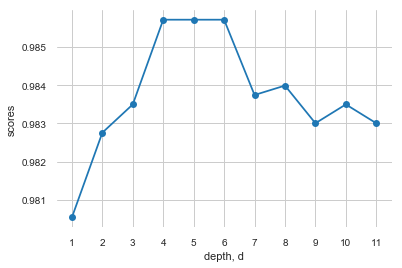

In [171]:
depth = range(1,12)
scores = []

for d in depth:
    classifier=DecisionTreeClassifier(max_depth = d)
    classifier=classifier.fit(X_train,y_train)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done".format(d))


plt.plot(depth, scores, '-o')
plt.xlabel('depth, d')
plt.ylabel('scores')
plt.xticks(depth)
plt.show()

In [174]:
classifier2=DecisionTreeClassifier(max_depth = 6)
classifier2=classifier.fit(X_train,y_train)
classifier2.score(X_test, y_test)

0.9834975369458128

In [175]:
dt_preds2 = classifier2.predict(X_test)
print(confusion_matrix(y_test, dt_preds2))
print(classification_report(y_test, dt_preds2))

[[3957   24]
 [  43   36]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3981
         1.0       0.60      0.46      0.52        79

   micro avg       0.98      0.98      0.98      4060
   macro avg       0.79      0.72      0.75      4060
weighted avg       0.98      0.98      0.98      4060



In [176]:
dt_fi = pd.DataFrame(classifier.feature_importances_)

In [177]:
names = pd.DataFrame(list(X.columns))
df_feat_imp = pd.concat([dt_fi, names], axis = 1)

In [178]:
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp.sort_values('Importance', ascending = False)

,Importance,Features
31,0.284382,2018_ThankYou
25,0.158496,2017_ThankYou
39,0.062816,2015_e
41,0.061302,2017_e
15,0.057546,2016_Other
12,0.046957,2015_Other
10,0.040543,2014_Other
36,0.026188,2012_e
2,0.022299,unknown
40,0.021960,2016_e


### Random Forest

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
rf = RandomForestClassifier(n_estimators = 90, max_depth = 10)
rf = rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print(score)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))

0.9859605911330049
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3981
         1.0       0.75      0.42      0.54        79

   micro avg       0.99      0.99      0.99      4060
   macro avg       0.87      0.71      0.76      4060
weighted avg       0.98      0.99      0.98      4060



In [181]:
print(confusion_matrix(y_test, rf_pred))

[[3970   11]
 [  46   33]]


In [182]:
fi = pd.DataFrame(rf.feature_importances_)

In [183]:
columns = pd.DataFrame(list(X.columns))

In [184]:
features = pd.concat([columns, fi], axis = 1)
features.columns = ['Feature', 'Importance']

In [185]:
features.sort_values("Importance", ascending = False).head(10)

,Feature,Importance
31,2018_ThankYou,0.128096
41,2017_e,0.121682
25,2017_ThankYou,0.088250
42,2018_e,0.065614
22,2017_Other,0.063359
40,2016_e,0.063202
12,2015_Other,0.055498
15,2016_Other,0.049041
39,2015_e,0.041313
38,2014_e,0.027708


In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [187]:
# Create a pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]

In [188]:
# Create grid search 
clf_best = GridSearchCV(pipe, search_space, cv=5, verbose=0)

In [189]:
# Fit grid search
best_model = clf_best.fit(X_train, y_train)

In [190]:
# View best model
best_model.best_estimator_.get_params()['classifier']

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [191]:
best_model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [192]:
score = best_model.score(X_test, y_test)
print("Accuracy Score")
print(score)
best_model_pred = best_model.predict(X_test)
print("")
print("Confusion Matrix")
print(confusion_matrix(y_test, best_model_pred))
print("")
print("Classif Matrix")
print(classification_report(y_test, best_model_pred))

Accuracy Score
0.9842364532019704

Confusion Matrix
[[3967   14]
 [  50   29]]

Classif Matrix
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3981
         1.0       0.67      0.37      0.48        79

   micro avg       0.98      0.98      0.98      4060
   macro avg       0.83      0.68      0.73      4060
weighted avg       0.98      0.98      0.98      4060

